<a href="https://colab.research.google.com/github/carloscesar182/ai_advanced_course/blob/main/Notebooks/AnomalyDetection/ExponentialSmoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
# gerar dados sintéticos
np.random.seed(5)
data = np.random.normal(0,1,100) + np.linspace(0,1,100)
data[50] = 4

In [4]:
# criar o modelo
modelo = SimpleExpSmoothing(data)

# parametro smoothing_level definie o quanto das observações passadas vão ter peso na suavização
model_fit = modelo.fit(smoothing_level=0.2, optimized=False)

In [5]:
# fazer o fit
data_pred = model_fit.predict(0,len(data)-1)

In [8]:
# buscar as anomalias
anomalies = np.where(np.abs(data - data_pred) > 3 * np.std(data))[0]
data[anomalies]

array([4.])

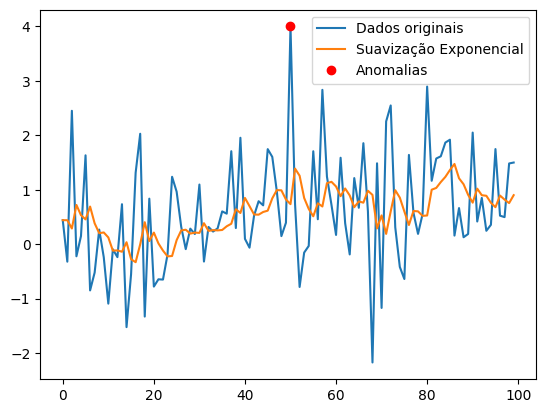

In [11]:
# gerar o grafico
plt.plot(data, label='Dados originais')
plt.plot(data_pred, label='Suavização Exponencial')
plt.plot(anomalies, data[anomalies], 'ro', label='Anomalias')
plt.legend()
plt.show()